# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Define Parameters and Simulate Data

# Numbers of data points for the simulation

N = 100000

sigma = 0.2

# Generate X from a standard normal distribution: X ~ N(0, 1)
X = np.random.normal(loc=0, scale=1, size=N)

# Generate epsilon from a standard normal distribution: epsilon ~ N(0, 1)
# Ensure epsilon is independent of X
epsilon = np.random.normal(loc=0, scale=1, size=N)

# Calculate Y = |X| + sigma * epsilon
Y = np.abs(X) + sigma * epsilon

In [ ]:
cov_matrix = np.cov(X, Y)
sample_covariance = cov_matrix[0, 1]

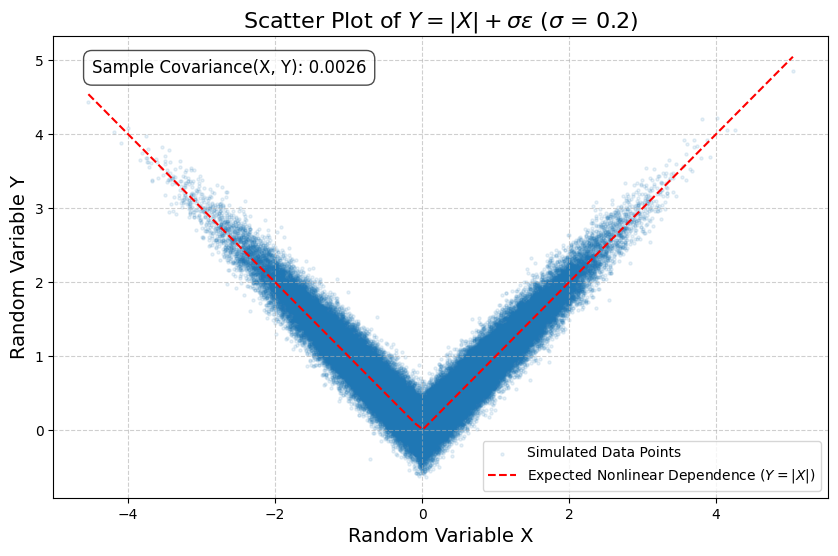

Sample Covariance(X, Y): 0.0026


In [25]:
# 3. Plot the Results
plt.figure(figsize=(10, 6))

# Plot the scatter plot of the simulated (X, Y) pairs
# Use a low alpha value to show density
plt.scatter(X, Y, s=5, alpha=0.1, label='Simulated Data Points')

# Add a title and labels
plt.title(f'Scatter Plot of $Y = |X| + \sigma\\epsilon$ ($\\sigma$ = {sigma})', fontsize=16)
plt.xlabel('Random Variable X', fontsize=14)
plt.ylabel('Random Variable Y', fontsize=14)

# Display the calculated covariance on the plot
plt.text(
    0.05, 0.95,
    f'Sample Covariance(X, Y): {sample_covariance:.4f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7)
)

# Draw the expected relationship Y = |X| (in red dashed lines)
# This shows the strong *nonlinear* association
x_range = np.linspace(np.min(X), np.max(X), 100)
y_expected = np.abs(x_range)
plt.plot(x_range, y_expected, 'r--', label='Expected Nonlinear Dependence ($Y = |X|$)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print(f"Sample Covariance(X, Y): {sample_covariance:.4f}")

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from random import sample

In [27]:
metabric=pd.read_csv("/Users/brookelumpkin/understanding_uncertainty/00_intro/data/metabric.csv")
metabric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at Diagnosis               1343 non-null   float64
 1   Type of Breast Surgery         1343 non-null   object 
 2   Cancer Type                    1343 non-null   object 
 3   Chemotherapy                   1343 non-null   object 
 4   Hormone Therapy                1343 non-null   object 
 5   Lymph nodes examined positive  1343 non-null   float64
 6   Mutation Count                 1343 non-null   float64
 7   Nottingham prognostic index    1343 non-null   float64
 8   Overall Survival (Months)      1343 non-null   float64
 9   Overall Survival Status        1343 non-null   object 
 10  Radio Therapy                  1343 non-null   object 
 11  TMB (nonsynonymous)            1343 non-null   float64
 12  Tumor Size                     1343 non-null   f

<Axes: xlabel='Radio Therapy', ylabel='Count'>

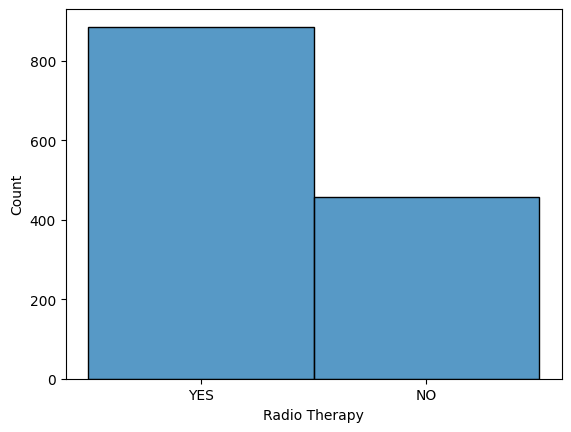

In [28]:
sns.histplot(metabric["Radio Therapy"])

In [29]:
metabric["RT_Binary"]=metabric["Radio Therapy"]
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,RT_Binary
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,YES
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,NO
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,YES
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,YES
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,YES


In [30]:
metabric["RT_Binary"]=metabric["RT_Binary"].replace({"YES":1,"NO":0})
metabric.head()

/var/folders/0f/p2hyp8hx6lnb_g8t3s01h7fc0000gn/T/ipykernel_92137/1522456996.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metabric["RT_Binary"]=metabric["RT_Binary"].replace({"YES":1,"NO":0})


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,RT_Binary
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,1
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,1
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,1
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,1


In [31]:
metabric["RT_Binary"].value_counts()

RT_Binary
1    886
0    457
Name: count, dtype: int64

In [32]:
y=metabric["RT_Binary"].values
y_mean=y.mean()
y_mean, y

(np.float64(0.659717051377513), array([1, 0, 1, ..., 1, 1, 1], shape=(1343,)))


# Code for the density distribution

In [33]:
# Bootstrapping

y=pd.Series(y)
def bootstrap(y, S=1000):
    estimates=[]
    for s in range(S):
        y_s=y.sample(frac=1, replace=True)
        mean_s=y_s.mean()
        estimates.append(mean_s)
    return np.array(estimates)

bootstrapped_means=bootstrap(y, S=1000)
bootstrapped_means

array([0.65599404, 0.65599404, 0.64780343, 0.64780343, 0.67535369,
       0.66195086, 0.65822785, 0.65227103, 0.66865227, 0.64556962,
       0.65971705, 0.66492926, 0.65524944, 0.66418466, 0.63291139,
       0.66046165, 0.67163068, 0.65599404, 0.66269546, 0.67833209,
       0.67386448, 0.66716307, 0.64184661, 0.67609829, 0.68428891,
       0.66195086, 0.66865227, 0.65078183, 0.64035741, 0.63886821,
       0.65152643, 0.65599404, 0.64854803, 0.65301564, 0.65376024,
       0.65599404, 0.64705882, 0.68726731, 0.66120625, 0.67684289,
       0.66716307, 0.67163068, 0.65897245, 0.64780343, 0.65673864,
       0.64705882, 0.64259121, 0.67460908, 0.67907669, 0.67460908,
       0.65152643, 0.65524944, 0.6813105 , 0.67163068, 0.67237528,
       0.66195086, 0.65599404, 0.64482502, 0.64705882, 0.66046165,
       0.67535369, 0.67311988, 0.67014147, 0.66195086, 0.64259121,
       0.64333582, 0.66939687, 0.67163068, 0.66716307, 0.62695458,
       0.67535369, 0.63961281, 0.65003723, 0.65152643, 0.63588

<Axes: ylabel='Density'>

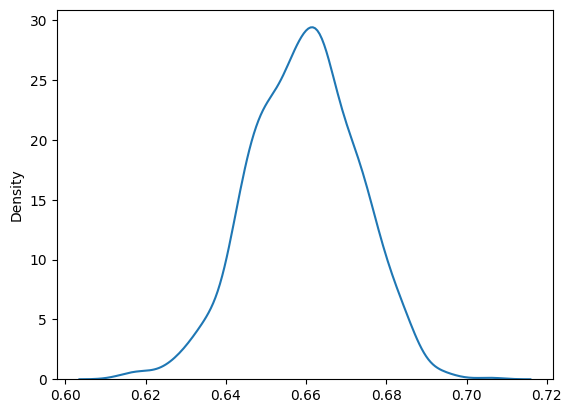

In [34]:
sns.kdeplot(bootstrapped_means)

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

In [36]:
import os
if os.getcwd().split('/')[-1] != '/Users/brookelumpkin/understanding_uncertainty/00_intro/data':
    os.chdir('/Users/brookelumpkin/understanding_uncertainty/00_intro/data')

<Axes: xlabel='price', ylabel='Proportion'>

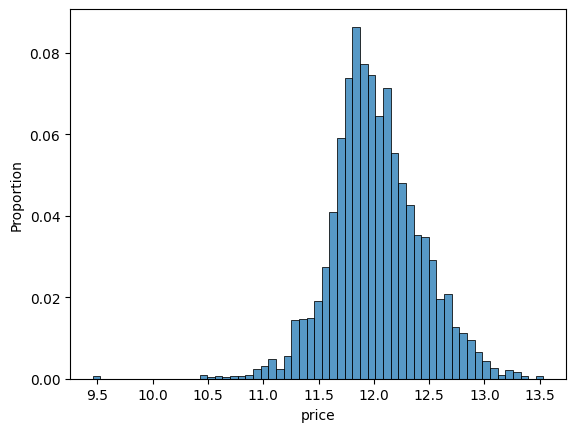

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('/Users/brookelumpkin/Documents/GitHub/understanding_uncertainty/data/ames_prices.csv')
y = np.log( df['price'] )
sns.histplot(y,stat='proportion')

I applied a log transformation to price to address its heavy right tail. After the transformation, the KDE appears roughly normal, so I chose to model the log-transformed prices using a normal distribution

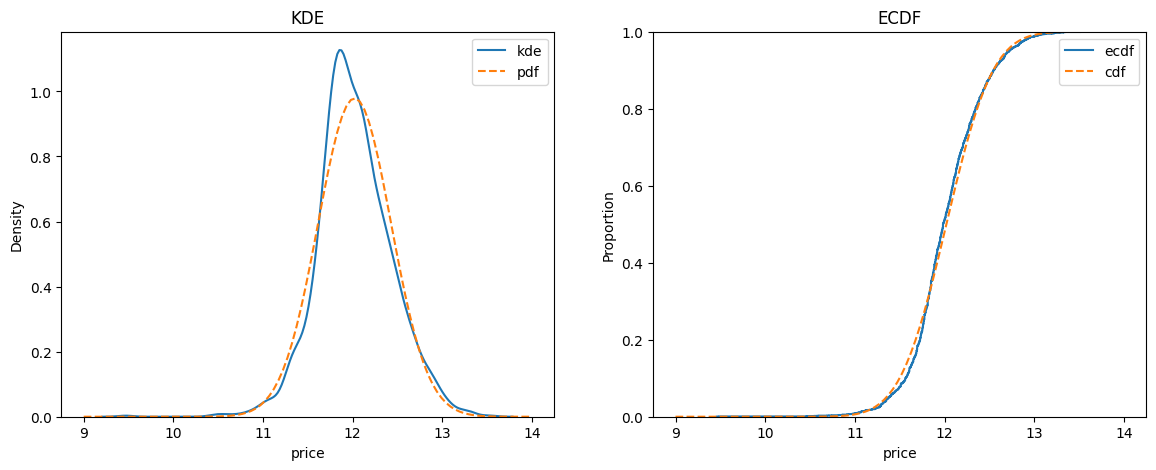

In [41]:
import scipy as sp 
import matplotlib.pyplot as plt

mu_hat = np.mean(y)
sigma_hat = np.sqrt( np.mean( (y-mu_hat)**2 ) )

grid = np.linspace(9,14,100)

pdf = sp.stats.norm.pdf(grid,loc=mu_hat,scale=sigma_hat)
cdf = sp.stats.norm.cdf(grid,loc=mu_hat,scale=sigma_hat)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=y,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('KDE')
sns.ecdfplot(x=y,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('ECDF')
plt.show()

There’s a slight irregularity at the KDE’s peak that doesn’t align with the theoretical PDF, causing the PDF to appear slightly right-shifted. The KDE also shows a bit of left skew, which contributes to this discrepancy. Overall, though, the model fits the data reasonably well. The ECDF reflects the same pattern, just represented differently

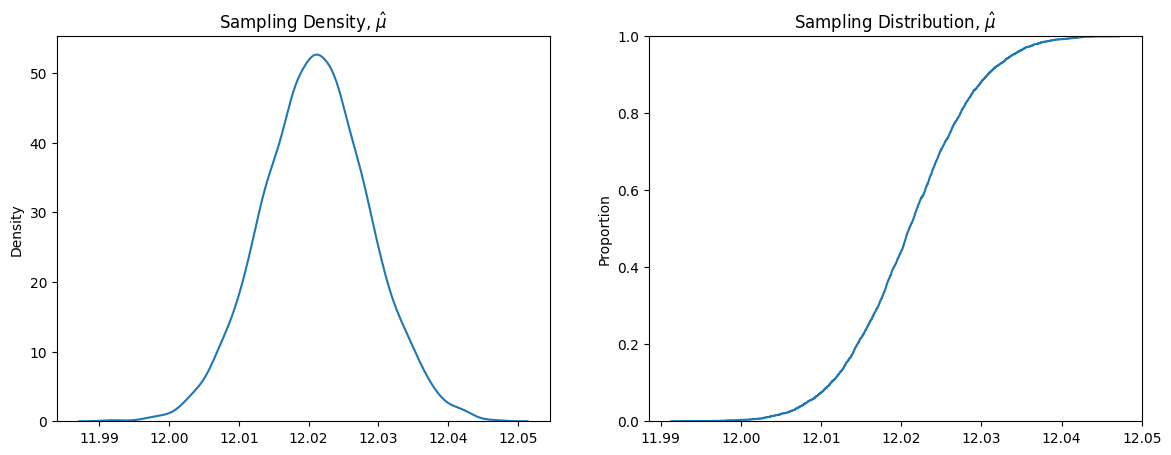

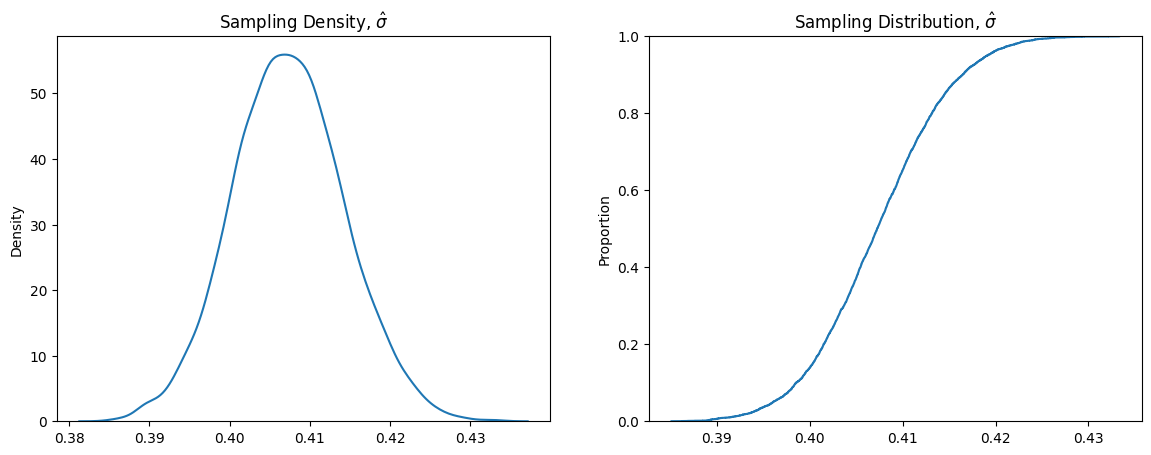

In [43]:
# Estimation:
def mle(y):
    mu_hat = np.mean(y)
    sigma_hat = np.sqrt( np.mean( (y-mu_hat)**2 ) )
    return mu_hat, sigma_hat

# Bootstrapping:
S = 5000
sample = [ mle(y.sample(frac=1.0,replace=True)) for s in range(S)]

# Sampling distributions:
mu_hat_sample = [ row[0] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=mu_hat_sample,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\mu}$')
sns.ecdfplot(x=mu_hat_sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\mu}$')
plt.show()

sigma_hat_samples = [ row[1] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sigma_hat_samples,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\sigma}$')
sns.ecdfplot(x=sigma_hat_samples,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\sigma}$')
plt.show()

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

In [44]:
import os
if os.getcwd().split('/')[-1] != 'data':
    os.chdir('../data')

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
metabric = pd.read_csv('metabric.csv')
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


<Axes: xlabel='Overall Survival (Months)', ylabel='Density'>

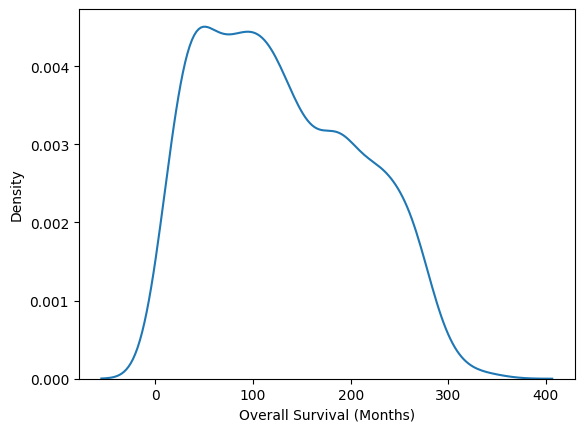

In [47]:
sns.kdeplot(data=metabric, x='Overall Survival (Months)')

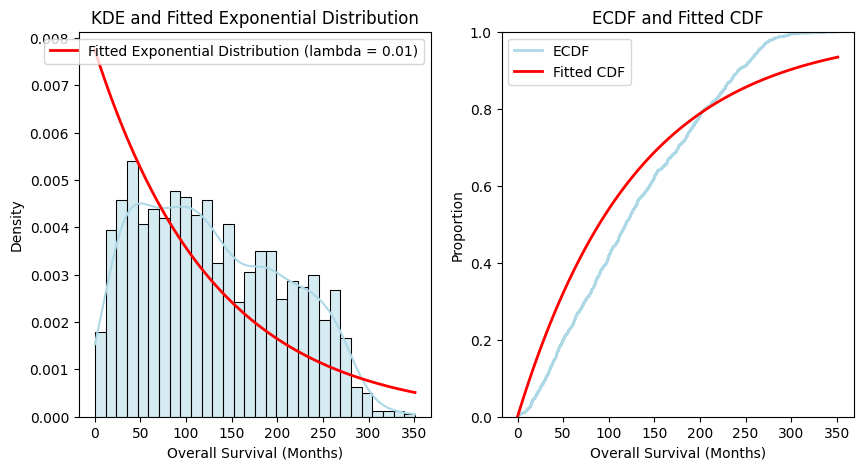

In [49]:
#Plot the KDE of the survival times and the fitted exponential distribution
X = metabric['Overall Survival (Months)'].values
lambda_hat = 1/np.mean(X)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=metabric, x='Overall Survival (Months)', stat='density', kde=True, color='lightblue', bins=30)

x = np.linspace(0, X.max(), 100)
pdf = lambda_hat * np.exp(-lambda_hat * x)
plt.plot(x, pdf, lw=2, label=f'Fitted Exponential Distribution (lambda = {lambda_hat:.2f})', color='red')
plt.title('KDE and Fitted Exponential Distribution')
plt.legend()

plt.subplot(1,2,2)
sns.ecdfplot(data=metabric, x='Overall Survival (Months)', label='ECDF', linewidth=2, color='lightblue')

cdf = 1 - np.exp(-lambda_hat * x)
plt.plot(x, cdf, lw=2, label='Fitted CDF', color='red')
plt.title('ECDF and Fitted CDF')
plt.legend()

plt.show()

Looking at the data, the maximum Overall Survival (Months) falls closer to 40 months than to zero. While this appears as a poor fit in our model, it actually reflects a positive outcome for patients. The fitted distribution has a noticeably flatter slope than the KDE between roughly 70 and 270 months, indicating that patients tend to survive much longer than the model anticipates—again, a good sign from a clinical perspective. The ECDF compared to the fitted CDF shows a similar pattern: the model consistently underestimates survival.

In a healthcare context, this makes sense. Patients who receive treatment likely meet certain baseline health criteria, meaning they may already be in better condition than the general population the model assumes.

Original lambda estimate: 0.0077
95% Bootstrap Confidence Interval for lambda: (0.0075, 0.0080)


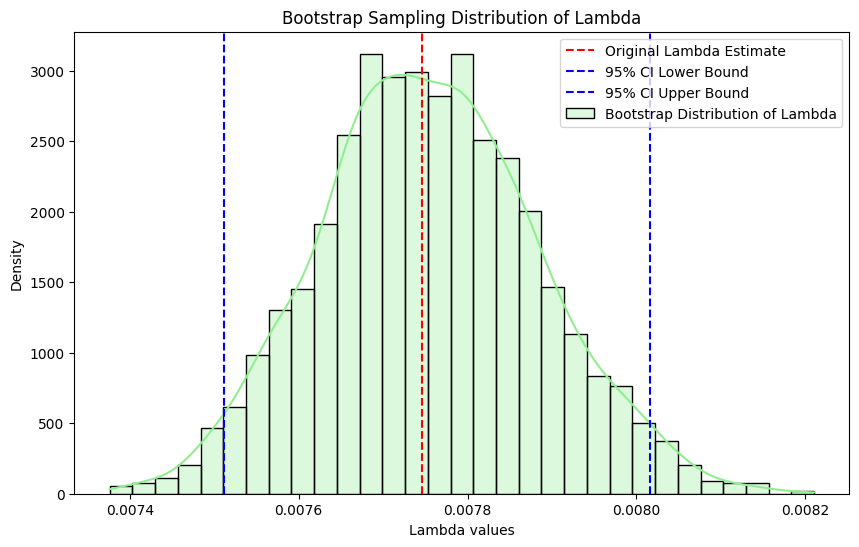

In [50]:
#Bootstrap the sampling distribution of lambda_hat
B = 2000
bootstrap_lambdas = []

for _ in range(B):
    sample = np.random.choice(X, size=len(X), replace=True)
    lambda_sample = 1/np.mean(sample)
    bootstrap_lambdas.append(lambda_sample)

bootstrap_lambdas = np.array(bootstrap_lambdas)

og_lambda = 1/np.mean(X)
ci_upper = np.percentile(bootstrap_lambdas, 97.5)
ci_lower = np.percentile(bootstrap_lambdas, 2.5)

print(f'Original lambda estimate: {og_lambda:.4f}')
print(f'95% Bootstrap Confidence Interval for lambda: ({ci_lower:.4f}, {ci_upper:.4f})')

plt.figure(figsize=(10,6))
sns.histplot(bootstrap_lambdas, stat='density', kde=True, color='lightgreen', alpha=0.3, label='Bootstrap Distribution of Lambda')
plt.axvline(og_lambda, color='red', linestyle='--', label='Original Lambda Estimate')
plt.axvline(ci_lower, color='blue', linestyle='--', label='95% CI Lower Bound')
plt.axvline(ci_upper, color='blue', linestyle='--', label='95% CI Upper Bound')
plt.title('Bootstrap Sampling Distribution of Lambda')
plt.xlabel('Lambda values')
plt.legend()
plt.show()

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.